In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
import os, shutil

In [3]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/xmh/AI_mask/mask_data'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(original_dataset_dir, 'train')
validation_dir = os.path.join(original_dataset_dir, 'validation')
test_dir = os.path.join(original_dataset_dir, 'test')

# Directory with our training mask pictures
train_mask_dir = os.path.join(train_dir, 'mask')

# Directory with our training no_mask pictures
train_no_mask_dir = os.path.join(train_dir, 'no_mask')

# Directory with our validation mask pictures
validation_mask_dir = os.path.join(validation_dir, 'mask')

# Directory with our validation no_mask pictures
validation_no_mask_dir = os.path.join(validation_dir, 'no_mask')

# Directory with our validation mask pictures
test_mask_dir = os.path.join(test_dir, 'mask')

# Directory with our validation no_mask pictures
test_no_mask_dir = os.path.join(test_dir, 'no_mask')



In [15]:
print('total training mask images:', len(os.listdir(train_mask_dir)))

print('total training no_mask images:', len(os.listdir(train_no_mask_dir)))

print('total validation mask images:', len(os.listdir(validation_mask_dir)))

print('total validation no_mask images:', len(os.listdir(validation_no_mask_dir)))

print('total test mask images:', len(os.listdir(test_mask_dir)))

print('total test no_mask images:', len(os.listdir(test_no_mask_dir)))


total training mask images: 160
total training no_mask images: 160
total validation mask images: 40
total validation no_mask images: 40
total test mask images: 20
total test no_mask images: 20


## Building network

In [59]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# model.add(layers.Dense(2, activation='softmax'))

In [60]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

## Data preprocessing

In [43]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [61]:
history = model.fit_generator(
      train_generator,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=4)

Epoch 1/20
32/32 [==============================] - 17s 543ms/step - loss: 0.7085 - acc: 0.5250 - val_loss: 0.6687 - val_acc: 0.6500
Epoch 2/20
32/32 [==============================] - 19s 578ms/step - loss: 0.6390 - acc: 0.6687 - val_loss: 0.6138 - val_acc: 0.6750
Epoch 3/20
32/32 [==============================] - 19s 583ms/step - loss: 0.5758 - acc: 0.7031 - val_loss: 0.5403 - val_acc: 0.8000
Epoch 4/20
32/32 [==============================] - 18s 564ms/step - loss: 0.5448 - acc: 0.7375 - val_loss: 0.5825 - val_acc: 0.7000
Epoch 5/20
32/32 [==============================] - 19s 596ms/step - loss: 0.4957 - acc: 0.7531 - val_loss: 0.6580 - val_acc: 0.6250
Epoch 6/20
32/32 [==============================] - 19s 599ms/step - loss: 0.4915 - acc: 0.7781 - val_loss: 0.5097 - val_acc: 0.7250
Epoch 7/20
32/32 [==============================] - 19s 596ms/step - loss: 0.4254 - acc: 0.7969 - val_loss: 0.5687 - val_acc: 0.7250
Epoch 8/20
32/32 [==============================] - 18s 548ms/step - 

In [62]:
model.save('mask_small_1.h5')

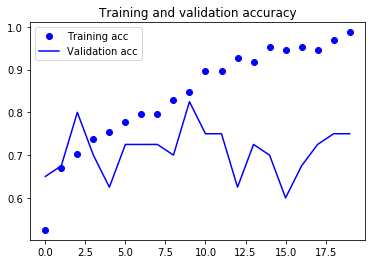

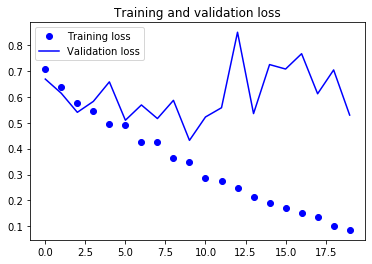

In [63]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Using data augmentation

In [64]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

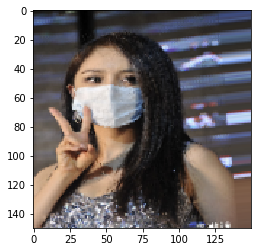

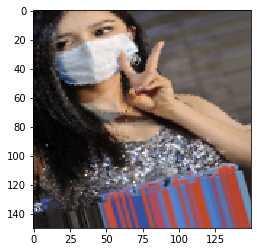

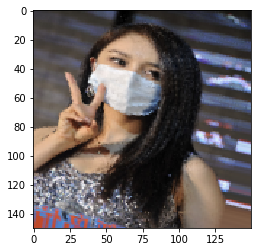

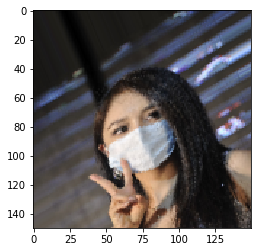

In [65]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_mask_dir, fname) for fname in os.listdir(train_mask_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [67]:
#add Dropout layer 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [69]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=20, #not work when steps_per_epoch * batch_size > data_size
      epochs=50,
      validation_data=validation_generator,
      validation_steps=4)

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/50
20/20 [==============================] - 21s 1s/step - loss: 0.6800 - acc: 0.5781 - val_loss: 0.6482 - val_acc: 0.6719
Epoch 2/50
20/20 [==============================] - 23s 1s/step - loss: 0.6470 - acc: 0.6500 - val_loss: 0.6269 - val_acc: 0.6406
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.6429 - acc: 0.6281 - val_loss: 0.5855 - val_acc: 0.6719
Epoch 4/50
20/20 [==============================] - 22s 1s/step - loss: 0.6247 - acc: 0.6562 - val_loss: 0.6053 - val_acc: 0.6250
Epoch 5/50
20/20 [==============================] - 22s 1s/step - loss: 0.6164 - acc: 0.6625 - val_loss: 0.5730 - val_acc: 0.7188
Epoch 6/50
20/20 [==============================] - 22s 1s/step - loss: 0.5926 - acc: 0.7000 - val_loss: 0.5577 - val_acc: 0.7500
Epoch 7/50
20/20 [==============================] - 22s 1s/step - loss: 0.5913 - acc: 0.6781 - val_loss: 0.6220 - val_acc: 0.6562
Epoch 8/5

In [71]:
model.save('mask_small_2.h5')

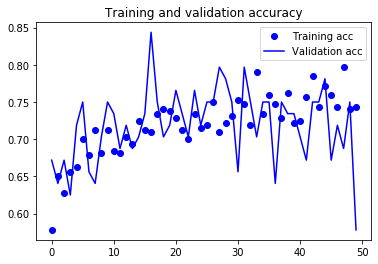

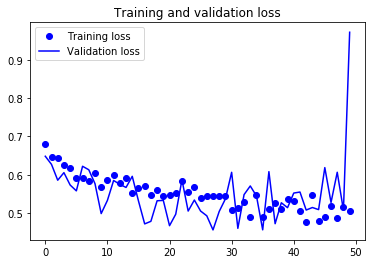

In [72]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Using a pre-trained convnet

### Feature extraction

In [73]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [75]:
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 320)
validation_features, validation_labels = extract_features(validation_dir, 80)
test_features, test_labels = extract_features(test_dir, 40)

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [76]:
#reshape to features extracted
train_features = np.reshape(train_features, (320, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (80, 4 * 4 * 512))
test_features = np.reshape(test_features, (40, 4 * 4 * 512))

In [77]:
#densely-connected classifier
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
10/10 [==============================] - 1s 60ms/step - loss: 0.8882 - acc: 0.5125 - val_loss: 0.7268 - val_acc: 0.5750
Epoch 2/30
10/10 [==============================] - 0s 31ms/step - loss: 0.8396 - acc: 0.4875 - val_loss: 0.7182 - val_acc: 0.6250
Epoch 3/30
10/10 [==============================] - 0s 32ms/step - loss: 0.8149 - acc: 0.5531 - val_loss: 0.7174 - val_acc: 0.6000
Epoch 4/30
10/10 [==============================] - 0s 28ms/step - loss: 0.7802 - acc: 0.5688 - val_loss: 0.7140 - val_acc: 0.5500
Epoch 5/30
10/10 [==============================] - 0s 30ms/step - loss: 0.7761 - acc: 0.5562 - val_loss: 0.7107 - val_acc: 0.5625
Epoch 6/30
10/10 [==============================] - 0s 35ms/step - loss: 0.7653 - acc: 0.5250 - val_loss: 0.7080 - val_acc: 0.5375
Epoch 7/30
10/10 [==============================] - 0s 37ms/step - loss: 0.7531 - acc: 0.5219 - val_loss: 0.7073 - val_acc: 0.5000
Epoch 8/30
10/10 [==============================] - 0s 26ms/step - loss: 0.7422 - a

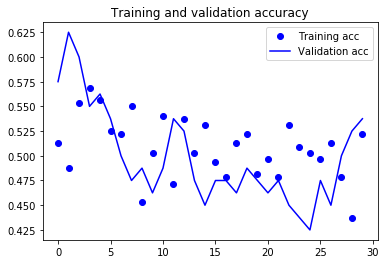

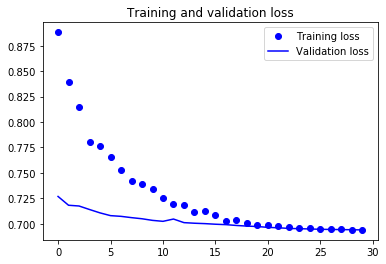

In [78]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [79]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [80]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [81]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [82]:
conv_base.trainable = False

In [83]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [84]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=4,
      verbose=2)

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/30
20/20 - 59s - loss: 0.6919 - acc: 0.5250 - val_loss: 0.6262 - val_acc: 0.7000
Epoch 2/30
20/20 - 60s - loss: 0.6454 - acc: 0.6344 - val_loss: 0.6046 - val_acc: 0.6875
Epoch 3/30
20/20 - 61s - loss: 0.6020 - acc: 0.7250 - val_loss: 0.5539 - val_acc: 0.7375
Epoch 4/30
20/20 - 63s - loss: 0.5754 - acc: 0.7375 - val_loss: 0.5292 - val_acc: 0.7250
Epoch 5/30
20/20 - 60s - loss: 0.5370 - acc: 0.7594 - val_loss: 0.5183 - val_acc: 0.7625
Epoch 6/30
20/20 - 66s - loss: 0.5137 - acc: 0.7969 - val_loss: 0.4952 - val_acc: 0.7500
Epoch 7/30
20/20 - 65s - loss: 0.5112 - acc: 0.7750 - val_loss: 0.5031 - val_acc: 0.7500
Epoch 8/30
20/20 - 59s - loss: 0.4765 - acc: 0.8031 - val_loss: 0.4669 - val_acc: 0.7875
Epoch 9/30
20/20 - 59s - loss: 0.4615 - acc: 0.8031 - val_loss: 0.4521 - val_acc: 0.7500
Epoch 10/30
20/20 - 59s - loss: 0.4566 - acc: 0.8125 - val_loss: 0.4404 - val_acc: 0.7875
Epoch 11/30
20/20 - 58s - lo

In [85]:
model.save('mask_small_3.h5')

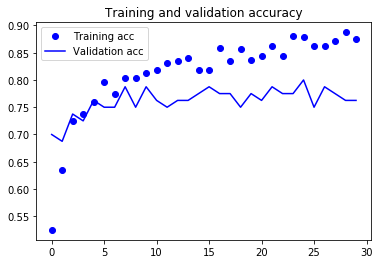

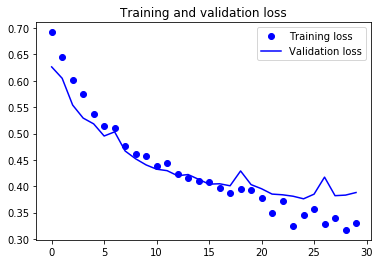

In [86]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine-tuning

In [87]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [88]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=4)

Epoch 1/50
20/20 [==============================] - 74s 4s/step - loss: 0.3492 - acc: 0.8375 - val_loss: 0.3911 - val_acc: 0.7875
Epoch 2/50
20/20 [==============================] - 67s 3s/step - loss: 0.2778 - acc: 0.8969 - val_loss: 0.3514 - val_acc: 0.8375
Epoch 3/50
20/20 [==============================] - 66s 3s/step - loss: 0.2755 - acc: 0.9031 - val_loss: 0.3536 - val_acc: 0.8250
Epoch 4/50
20/20 [==============================] - 67s 3s/step - loss: 0.2585 - acc: 0.8875 - val_loss: 0.3522 - val_acc: 0.8500
Epoch 5/50
20/20 [==============================] - 67s 3s/step - loss: 0.2162 - acc: 0.9281 - val_loss: 0.3512 - val_acc: 0.8375
Epoch 6/50
20/20 [==============================] - 66s 3s/step - loss: 0.2025 - acc: 0.9156 - val_loss: 0.4161 - val_acc: 0.8000
Epoch 7/50
20/20 [==============================] - 65s 3s/step - loss: 0.2075 - acc: 0.9094 - val_loss: 0.4134 - val_acc: 0.7875
Epoch 8/50
20/20 [==============================] - 65s 3s/step - loss: 0.1813 - acc: 0.92

In [89]:
model.save('mask_small_4.h5')

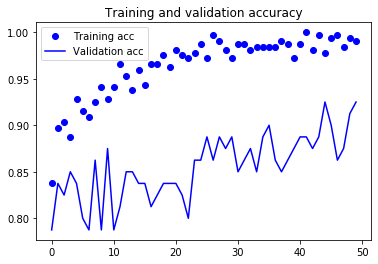

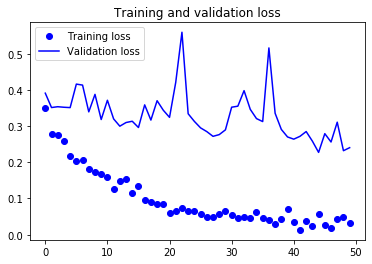

In [90]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [91]:
#evaluate this model on the test data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=2)
print('test acc:', test_acc)

Found 40 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.925000011920929
